# Lesson 1: gather the tools for RL
In this notebook, you will learn:
* Create a virtual enviroment from OpenAI
* Visualize the game and know how to use it
* Create a simple model(agent) to play the game
* Reloading Agent from memory

## Dependencies

In [12]:
# Test classical game in OpenAI
%matplotlib inline
import gym
import matplotlib.pyplot as plt
import torch
import cv2
import os

## Create a virtual enviroment from OpenAI

In [2]:
Atari_name = 'ALE/SpaceInvaders-v5'
env = gym.make(Atari_name)
#env = gym.make('CartPole-v1')
#env = gym.make('MountainCar-v0')
#env = gym.make('ALE/MsPacman-v5')
height, width, channels = env.observation_space.shape
actions = env.action_space.n

A.L.E: Arcade Learning Environment (version 0.7.4+069f8bd)
[Powered by Stella]


In [17]:
# A function to have a glance of the design of the gam
def query_environment(name):
  env = gym.make(name)
  spec = gym.spec(name)
  print(f"Action Space: {env.action_space}")
  print(f"Observation Space: {env.observation_space}")
  print(f"Max Episode Steps: {spec.max_episode_steps}")
  print(f"Nondeterministic: {spec.nondeterministic}")
  print(f"Reward Range: {env.reward_range}")
  print(f"Reward Threshold: {spec.reward_threshold}")

In [18]:
query_environment(Atari_name)

Action Space: Discrete(6)
Observation Space: Box(0, 255, (210, 160, 3), uint8)
Max Episode Steps: 27000
Nondeterministic: False
Reward Range: (-inf, inf)
Reward Threshold: None


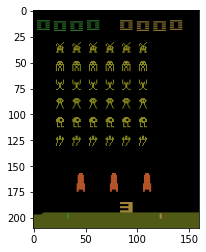

In [16]:
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

In [4]:
env.unwrapped.get_action_meanings()

['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']

Here we saved the played game as atari_trail_#.avi

You can also try to render the game if your OS supports it correctly. However, if you have several errors, check this [article](https://liveproject.manning.com/module/264_3_2/reinforcement-learning-for-self-driving-vehicles/2--optimizing-agent%27s-performance-in-openai-gym/rendering-environment-outputs-%26-q-learning?) for support. Otherwise you can use the code here to write the played games as .avi. 

In [15]:
os.makedirs('played_out',exist_ok=True)
episodes = 10
write_play_every_episode = 5
record_video = False
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    img = env.render(mode="rgb_array")
    
    if  episode%write_play_every_episode == 0:
        record_video = True
        height, width, layers = img.shape
        size = (width,height)
        out = cv2.VideoWriter(f'./played_out/project_{episode}.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
    else:
        record_video = False
    
    while not done:
        if record_video == True:
            img = env.render(mode="rgb_array")
            img_cv2 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            out.write(img_cv2)
            
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward
    
    if record_video:
        out.release()
        
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

Episode:1 Score:310.0
Episode:2 Score:360.0
Episode:3 Score:75.0
Episode:4 Score:50.0
Episode:5 Score:185.0
Episode:6 Score:210.0
Episode:7 Score:30.0
Episode:8 Score:135.0
Episode:9 Score:155.0
Episode:10 Score:50.0
